In [2]:
import pandas as pd
import plotly.express as px
# So this isn't stratified
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import plotly.figure_factory as ff
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
from sklearn.metrics import plot_confusion_matrix
import plotly.graph_objects as go


In [3]:
stroke_df = pd.read_csv("./Data/healthcare-dataset-stroke-data.csv")

# https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [4]:
stroke_df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
stroke_df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
stroke_df.duplicated().value_counts()

False    5110
dtype: int64

In [8]:
stroke_df = stroke_df.dropna(axis=0)

In [9]:
stroke_df.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [10]:
print(stroke_df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [11]:
# This is how many (rows, columns) there are
stroke_df.shape

(4909, 12)

In [12]:
clean_stroke_df = pd.get_dummies(stroke_df, columns=['gender','ever_married','work_type','Residence_type','smoking_status']) #Other columns here
clean_stroke_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [13]:
clean_stroke_df = clean_stroke_df.drop(['id'], axis=1)
clean_stroke_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [14]:
print(clean_stroke_df.columns)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


In [15]:
feature_columns = list(clean_stroke_df.columns)
feature_columns.remove('stroke')
y_column = 'stroke'


In [16]:
X = clean_stroke_df[feature_columns]
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0


In [17]:
y = clean_stroke_df[y_column]
y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [18]:
# from sklearn.preprocessing import StandardScaler
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=0.2, random_state=42)

# y_train.value_counts() 


In [5]:

over = SMOTE(sampling_strategy=0.1, random_state=14)
X_smote, y_smote = over.fit_resample(X, y)
under = RandomUnderSampler(sampling_strategy=0.8, random_state=25)
X_over, y_over = under.fit_resample(X_smote, y_smote)

X_train, X_test, y_train, y_test = train_test_split(
     X_over, y_over, test_size=0.2, random_state=42, stratify=y_over)

NameError: name 'X' is not defined

In [20]:
# This one is stratified
y_train.value_counts()

0    469
1    376
Name: stroke, dtype: int64

In [21]:
y_test.value_counts()

0    118
1     94
Name: stroke, dtype: int64

For our data science project, we created a model that would analyze and predict the probability of having a stroke based on a dataset. Our product uses machine learning to classify individuals with certain traits into categories that indicate stroke risk. We utilized five different 



Here, the Frenzied Physicists split our data on Stroke victims into X and Y, with <u>x being patient traits </u> \(age, sex, bmi, etc.\)  and <u>y being if they had a stroke or not</u>. We then divided up all of our data into an 80:20 ratio., with the <u>80% being our training data</u> and the <u>20% being our testing data</u>. One challenge we faced when dividing the data was that because our percentage of stroke victims compared to non\-stroke victims was so small, we risked grouping all of our stroke victims into the testing data and creating a training dataset that consisted of mostly non\-stroke victims. To ensure that the ratio remained consistent, we **stratified** our data. Upsampled the minority class \(people with strokes using SMOTE\) and then downsampled the majority classing randomly. 



In the following lines of code, F.P. utilized five different classifiers to train our data. We used _GridsearchCV_ for hyper\-parameter tuning, enabling us to find the best combinations of paramaters to **best** classify our data. 



Our outputs when running these models gave us four values: **Accuracy, precision, recall,** 
**and F1 score**. 

_**Accuracy**_ _refers to_ the number of correct predictions \(for both positive and negative class\) made. \-&gt; \(Sensitivity \+ Specificity\) / 2 = TP \+ TN / \(TP \+ TN \+FN \+ FP\)

_**Precision**_ _refers to the differences between obtained results regardless of their accuracy._ \-&gt; true positives / \(true positives \+ false positives\) 

_**Recall**_ _refers to_ the ratio between true positives and false negatives, with true positives referring to our model correctly predicting something and false negatives referring to our model incorrectly not predicting something. \-&gt; true positives / \(true positives \+ false negatives\)

_**F1 Score**_ _refers to the summing up of precision and recall to evaluate the performance of our model._ \(Why is this scoring metric used vs accuracy\)

What is a false positive vs a false negative? 



In [34]:
abc = {}
abc['a'] = {'anthony':1, 'skyler':2}
abc['b'] = {'anthony':3, 'skyler':4}

abc_df = pd.DataFrame(abc)

[[1, 3], [2, 4]]

In [68]:
fig = go.Figure(data=[go.Table(header=dict(values=list(abc_df.columns)),
                 cells=dict(values=abc_df.values.tolist()))
                     ])
fig.show()

In [69]:
scores = {} 
scores['metrics'] = {'accuracy': 'accuracy', 'precision':'precision', 'recall':'recall', 'f1_score':'f1_score'}


Accuracy: 0.8018867924528302
Precision: 0.7407407407407407
Recall: 0.851063829787234
F1 Score: 0.7920792079207921


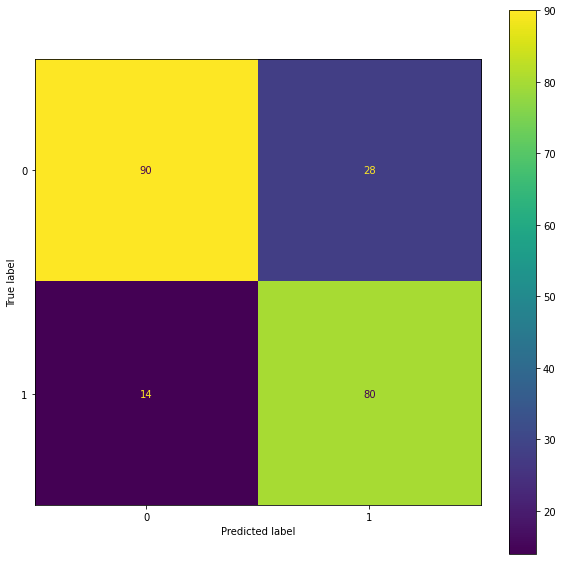

In [70]:

tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_tree))
print("Precision:", metrics.precision_score(y_test, y_pred_tree))
print("Recall:", metrics.recall_score(y_test, y_pred_tree))
print("F1 Score:", metrics.f1_score(y_test, y_pred_tree))

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test, y_pred_tree, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot(ax=ax)

acc = metrics.accuracy_score(y_test, y_pred_tree)
prec = metrics.precision_score(y_test, y_pred_tree)
recall = metrics.recall_score(y_test, y_pred_tree)
f1 = metrics.f1_score(y_test, y_pred_tree)
scores['tree_clf'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}

# cm_text = [[str(y) for y in x] for x in cm]

# fig = ff.create_annotated_heatmap(cm, x=[0,1], y= [1,0], annotation_text=cm_text, colorscale='Viridis')
# fig.add_annotation(dict(font=dict(color="black",size=14),
#                         x=0.5,
#                         y=-0.15,
#                         showarrow=False,
#                         text="Predicted value",
#                         xref="paper",
#                         yref="paper"))

# # add custom yaxis title
# fig.add_annotation(dict(font=dict(color="black",size=14),
#                         x=-0.35,
#                         y=0.5,
#                         showarrow=False,
#                         text="Real value",
#                         textangle=-90,
#                         xref="paper",
#                         yref="paper"))
# # adjust margins to make room for yaxis title
# fig.update_layout(margin=dict(t=50, l=200))

# # add colorbar
# fig['data'][0]['showscale'] = True
# fig.show()


Our model seems to be predicting things very well. It's able to classify the majority of the positive and negative classes. It correctly labeled 90 datapoints as being true negatives and then 80 as being True positives. However, our model seemed to incorrectly label too many things as being positive \(28 total\). I.e. we had too many false positives. From this we see that our precision is very low but then we see that it did a good job in predicting the negative class and minimizing False negatives. The recall is at 0.85 which is pretty good for a model. Our model performed well and had a score of .79 for the f1 score and .8 accuracy.  

90 is the best \(true negatives\)

14 False negatives

28 false Positives



In [71]:
pd.DataFrame(scores)

,metrics,tree_clf
accuracy,accuracy,0.801887
precision,precision,0.740741
recall,recall,0.851064
f1_score,f1_score,0.792079


A **decision tree classifier** is a form of classifier that maps differences and categories of data for the purpose of easily visualizing it. More importantly, they are able to capture decision\-making knowledge from supplied data, making this type of classifier a good fit. Important parameters include:

- <u>Criterion</u>: This feature measures the quality of the split, or in other words determines if the division of data is appropriate. In this model, 'gini' refers to gini impurity and entropy refers to the shannon information gain. 
- <u>Max features</u>: This refers to the strategy used to find the best split at a node. 
- <u>Max depth</u>: Setting a max depth limits the number of branches that your tree can have. This can be helpful if there are various variables and a lot of data that could result in an incoherent and unreadable tree. By setting max depths \(say four or five branches\) your tree is forced to display only the most relevant information. 
- <u>Min samples split</u>: The minimum number of samples needed to split an internal node. 
- <u>Min samples leaf</u>: The minimum number of samples needed to be included in a leaf node. 

Visualization is perk not purpose. Clarify first sentence. 



/projects/4ecc52f5-f80b-4322-9a0d-563e88b9d2a6/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


5220 fits failed out of a total of 46980.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5220 fits failed with the following error:
Traceback (most recent call last):
  File "/projects/4ecc52f5-f80b-4322-9a0d-563e88b9d2a6/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/projects/4ecc52f5-f80b-4322-9a0d-563e88b9d2a6/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/projects/4ecc52f5-f80b-4322-9a0d-563e88b9d2a6/.local/lib/python3

Accuracy: 0.7594339622641509
Precision: 0.7362637362637363
Recall: 0.7127659574468085
F1 Score: 0.7243243243243244


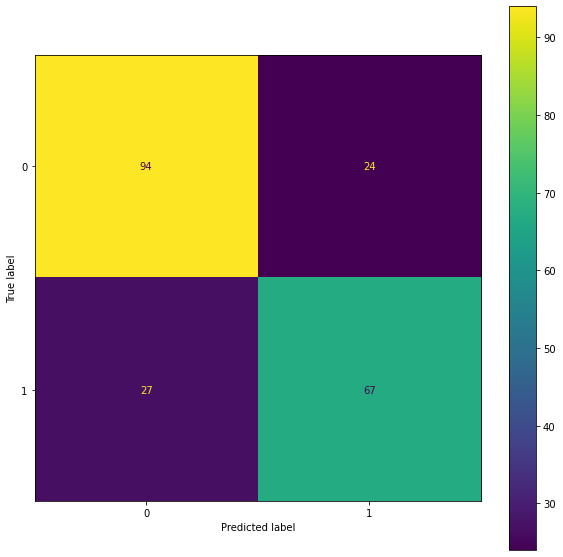

In [76]:
parameters = {'criterion' :['gini', 'entropy'],
              'max_features' :['sqrt', 'log2'],
              'max_depth' :range(1,30),
              'min_samples_split' :range(1,10),
              'min_samples_leaf' :range(1,10)} 
tree_gs = GridSearchCV(tree_clf, parameters)
tree_gs.fit(X_train, y_train)
tree_clf = tree.DecisionTreeClassifier(**tree_gs.best_params_)
tree_clf = tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_tree))
print("Precision:", metrics.precision_score(y_test, y_pred_tree))
print("Recall:", metrics.recall_score(y_test, y_pred_tree))
print("F1 Score:", metrics.f1_score(y_test, y_pred_tree))
fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test, y_pred_tree, labels=tree_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot(ax=ax)
acc = metrics.accuracy_score(y_test, y_pred_tree)
prec = metrics.precision_score(y_test, y_pred_tree)
recall = metrics.recall_score(y_test, y_pred_tree)
f1 = metrics.f1_score(y_test, y_pred_tree)
scores['tree_clf_gs'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}


Our second decision tree classifier is much like our first. Note that our Output is slightly different from the first dtc. Data issues still prominent.



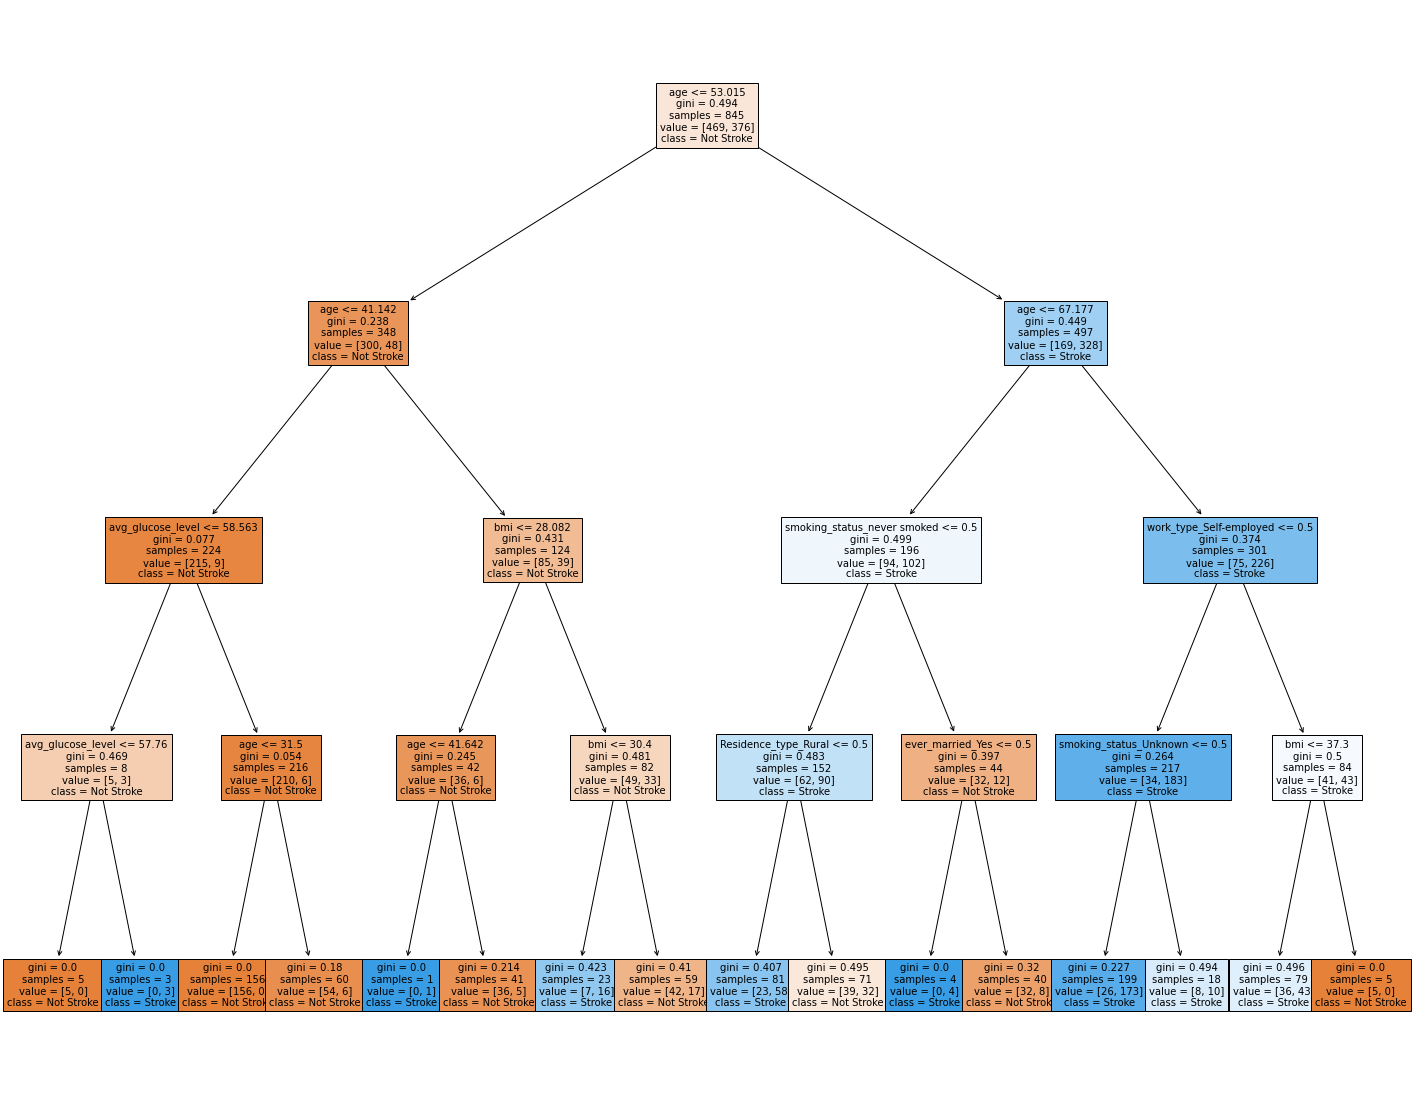

In [101]:
tree_clf = tree.DecisionTreeClassifier(max_depth=4)
tree_clf = tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf, 
                   feature_names=feature_columns,  
                   class_names=['Not Stroke','Stroke'],
                   filled=True, fontsize=10)

plt.savefig("dt.jpg")

In [0]:
_

This decision tree shows us what our coding from earlier described. The decision tree is taking the attributes and splitting the data into subsets, predicting a logical outcome based on what it is given. Each of the boxes show important data like, for instance, at the to it says "age is less than or equal to 53.015" if this is true than the patient will move to the left, and if it is false it will go to the right, it will then follow this pattern of "x is less than or equal to y" until we reach the bottom. \(Leaves are the decisions\).  Also you can see that each of the boxes are colored orange or blue, if it is colored blue than that patient in out data had a stroke whereas if it is orange they did not have a stroke, also as the colors get lighter  the gini impurity gets higher, Gini impurity is a function that determines how well a decision tree was split, so the closer to zero it is
the better it is when it is closer to 0.5, which is the maximum, that means the tree was split worse.

Splitting at features



Testing-set Accuracy score is: 0.7735849056603774
Recall: 0.8404255319148937
F1 Score: 0.7669902912621359


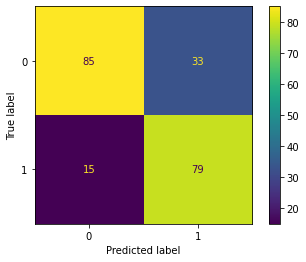

In [78]:


clf_rf = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 200, max_depth=4, criterion='gini')
clf_rf = clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)
acc_rf = metrics.accuracy_score(y_test, y_pred_rf)
print('Testing-set Accuracy score is:', acc_rf)
print("Precision:", metrics.precision_score(y_test, y_pred_rf))
print("Recall:", metrics.recall_score(y_test, y_pred_rf))
print("F1 Score:", metrics.f1_score(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot()

acc = metrics.accuracy_score(y_test, y_pred_rf)
prec = metrics.precision_score(y_test, y_pred_rf)
recall = metrics.recall_score(y_test, y_pred_rf)
f1 = metrics.f1_score(y_test, y_pred_rf)
scores['clf_rf'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}


A random forest is a classification algorithm that consists of multiple decision trees. Each decision tree is run and spits out a ‘vote’ and the random forest’s result is the prediction that the most decision trees voted for. While random forests are quite accurate due to the sheer volume of predictions they make, this sheer volume also makes these models a bit slow to train and ineffective for real\-time predictions.



SUHAS/ESMERALDA`



In [4]:
clf_rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [x for x in range(200, 500)],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [1,2,3,4,5,6,7],
    'criterion' :['gini', 'entropy']}
clf_rf_gs = GridSearchCV(clf_rf, param_grid)
clf_rf_gs.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [3]:
clf_rf = RandomForestClassifier(**clf_rf_gs.best_params_)
clf_rf = clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)
acc_rf = metrics.accuracy_score(y_test, y_pred_rf)
print('Testing-set Accuracy score is:', acc_rf)
#print("Precision:", metrics.precision_score(y_test, y_pred_rf))
print("Recall:", metrics.recall_score(y_test, y_pred_rf))
print("F1 Score:", metrics.f1_score(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot()

acc = metrics.accuracy_score(y_test, y_pred_rf)
prec = metrics.precision_score(y_test, y_pred_rf)
recall = metrics.recall_score(y_test, y_pred_rf)
f1 = metrics.f1_score(y_test, y_pred_rf)
scores['clf_rf_gs'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}

NameError: name 'clf_rf_gs' is not defined

In [81]:
# knn = KNeighborsClassifier(n_neighbors = 5)
# knn.fit(X_train, y_train)
# y_pred_knn = knn.predict(X_test)
# acc_knn = metrics.accuracy_score(y_test,y_pred_knn)
# print("KNN Model Acuuracy is:", acc_knn)
# print("Precision:", metrics.precision_score(y_test, y_pred_knn))
# print("Recall:", metrics.recall_score(y_test, y_pred_knn))
# print("F1 Score:", metrics.f1_score(y_test, y_pred_knn))
# cm = confusion_matrix(y_test, y_pred_knn, labels=tree_clf.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
# disp.plot()


n_neighbors = list(range(1,30))

hyperparameters = {'n_neighbors':n_neighbors}
knn_2 = KNeighborsClassifier()
knn_gs =  GridSearchCV(knn_2, hyperparameters, cv=10)
knn_gs.fit(X,y)

knn = KNeighborsClassifier(**knn_gs.best_params_)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred_knn)
prec = metrics.precision_score(y_test, y_pred_knn)
recall = metrics.recall_score(y_test, y_pred_knn)
f1 = metrics.f1_score(y_test, y_pred_knn)
scores['knn'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}

In [82]:
pd.DataFrame(scores)

,metrics,tree_clf,tree_clf_gs,clf_rf,clf_rf_gs,knn
accuracy,accuracy,0.801887,0.759434,0.773585,0.792453,0.768868
precision,precision,0.740741,0.736264,0.705357,0.727273,0.718447
recall,recall,0.851064,0.712766,0.840426,0.851064,0.787234
f1_score,f1_score,0.792079,0.724324,0.766990,0.784314,0.751269


K Nearest Neighbor classifies what where new data belongs between two groups based on its "neighbors." This means the points of data the new data is closest to and making a vote. The closest points on each side each count as a vote so the new data will be classified with the group that has more votes. 

Use odd values more. 



SVC Accuracy score is: 0.7358490566037735
Precision: 0.6696428571428571
Recall: 0.7978723404255319
F1 Score: 0.7281553398058253


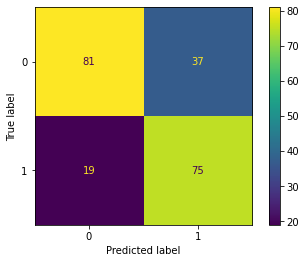

In [83]:
# Support Vector Classifier 
svc = SVC(random_state = 42)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
acc_svc = svc.score(X_test, y_test)
print("SVC Accuracy score is:", acc_svc)
print("Precision:", metrics.precision_score(y_test, svc_pred))
print("Recall:", metrics.recall_score(y_test, svc_pred))
print("F1 Score:", metrics.f1_score(y_test, svc_pred))
cm = confusion_matrix(y_test, svc_pred, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot()

acc = metrics.accuracy_score(y_test, svc_pred)
prec = metrics.precision_score(y_test, svc_pred)
recall = metrics.recall_score(y_test, svc_pred)
f1 = metrics.f1_score(y_test, svc_pred)
scores['svc'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}

# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']}

# clf = GridSearchCV(tree_clf, parameters)
# clf.fit(X_train, y_train)


# sorted(clf.cv_results_.keys())

<p

<p

<p

We tried using the &lt;b&gt;Support Vector Classifier&lt;/b&gt; which uses classification algorithms for our two groups.  SVC puts the data into a hyperplane which separates our 'stroke' and 'no stroke' data with a decision boundary line. For our parameters we applied the rbf kernel and gamma which helps with non linear classifier, while the C parameter trades off correct classification of training examples against maximization of the boundary line.  The results weren't amazing, other model learning machines were better, but they were pretty good results. Lacking in precision, the SVC came out with a lot of false positives and fewer false negatives which is better for our data set since we are dealing with strokes. In the real world, it is better to predict a false stroke then to predict no stroke at all.



In [84]:
pd.DataFrame(scores)

,metrics,tree_clf,tree_clf_gs,clf_rf,clf_rf_gs,knn,svc
accuracy,accuracy,0.801887,0.759434,0.773585,0.792453,0.768868,0.735849
precision,precision,0.740741,0.736264,0.705357,0.727273,0.718447,0.669643
recall,recall,0.851064,0.712766,0.840426,0.851064,0.787234,0.797872
f1_score,f1_score,0.792079,0.724324,0.766990,0.784314,0.751269,0.728155


Accuracy: 0.839622641509434
Precision: 0.7941176470588235
Recall: 0.8617021276595744
F1 Score: 0.8265306122448979


/projects/4ecc52f5-f80b-4322-9a0d-563e88b9d2a6/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



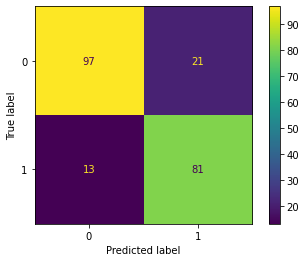

In [85]:
     logreg = LogisticRegression(class_weight="balanced")
logreg.fit(X_train,y_train)
y_pred_lr = logreg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_lr))
print("Precision:", metrics.precision_score(y_test, y_pred_lr))
print("Recall:", metrics.recall_score(y_test, y_pred_lr))
print("F1 Score:", metrics.f1_score(y_test, y_pred_lr))
cm = confusion_matrix(y_test, y_pred_lr, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot()


acc = metrics.accuracy_score(y_test, y_pred_lr)
prec = metrics.precision_score(y_test, y_pred_lr)
recall = metrics.recall_score(y_test, y_pred_lr)
f1 = metrics.f1_score(y_test, y_pred_lr)
scores['logreg'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}

In [86]:
pd.DataFrame(scores)

,metrics,tree_clf,tree_clf_gs,clf_rf,clf_rf_gs,knn,svc,logreg
accuracy,accuracy,0.801887,0.759434,0.773585,0.792453,0.768868,0.735849,0.839623
precision,precision,0.740741,0.736264,0.705357,0.727273,0.718447,0.669643,0.794118
recall,recall,0.851064,0.712766,0.840426,0.851064,0.787234,0.797872,0.861702
f1_score,f1_score,0.792079,0.724324,0.766990,0.784314,0.751269,0.728155,0.826531


Logistic regression is used to find the probability of something happening by  having the logistic odds of the event be a linear combination of one or more independent variables. We used logistic regression to predict and categorize dependent variable \(stroke\)
and using a set of independent variables \(age, health conditions\) to determine a binary out
come such as yes or no. When running our model we got a high accuracy score which meant that the correct number of predictions are made and we got a high f1 score which means that our model is performing well.



In [98]:
scores_df = pd.DataFrame(scores)
scores_df = round(scores_df, 2)

In [99]:
data = []
for column in scores_df.columns:
    data.append(scores_df[column].tolist())
fig = go.Figure(data=[go.Table(header=dict(values=list(scores_df.columns)),
                 cells=dict(values=data))
                     ])
fig.show()

Overall, we achieved pretty good results. We achieved a max accuracy of 0.84 and a high f1 score of 0.83 both from the logistic regression. The logistic regression performed the best even when compared to the hyper\-parameter\-tuned models that we trained. The models that we hyper\-parameter tuned were the decision tree, random forest, KNN, and the SVC. Performing a grid search, an algorithm for hyperparameter tuning, for random forest improved our results, but ultimately still did not outperform logistic regression. Furthermore, performing a grid search for our decision tree worsened its results. This is because of the lack of scope for hyper parameters our decision tree contained. The decision tree did better than the random forest even though ensemble methods normally work better than just a normal decision tree. This might be due to the lack of features in the data. Because there are so little features when the random forest is training, the smaller decision trees trained on subsets of the features which may be negatively affecting the performance and the models aren't able to discern any new patterns. Our worst performing model was the support vector classifier because it's precision was .67, the lowest number from our range of recall, f1 score, accuracy, and precision. Precision measures the quality of a positive prediction made by the model. The low precision value of the support vector classifier was due to too many false positives, which means the model labelled negative values as positive. 



In [100]:
fig.write_html("results.html")